<a href="https://colab.research.google.com/github/Snigdha-Pothuri/p-122/blob/main/project_122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
data_to_load=files.upload()

Saving image.npz to image.npz


In [5]:
from google.colab import files
data_to_load=files.upload()

Saving labels.csv to labels.csv


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
X=np.load('image.npz')["arr_0"]
y=pd.read_csv("labels.csv")["labels"]
classes=["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
nclasses=len(classes)
print(X)
print(nclasses)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
26


1


ValueError: ignored

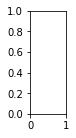

In [16]:
import seaborn as sns
sample_per_class=5
figure=plt.figure(figsize=(20,11))
idx_cls=0
for i in classes:
  idxs=np.flatnonzero(y==i)
  idxs=np.random.choice(idxs,sample_per_class,replace=False)
  j=0
  for k in idxs:
    plt_index=j*nclasses+idx_cls+1
    print(plt_index)
    p=plt.subplot(sample_per_class,nclasses,plt_index)
    p=sns.heatmap(np.reshape(X[k],(28,28)),cmap=plt.cm.gray,cbar=False)
    p=plt.axis("off")
    j=j+1
  idx_cls=idx_cls+1

In [17]:
print(X[0])
print(y[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255. 255.
 255.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 255. 255.   0.   0.   0.   0.
   0. 

In [18]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,random_state=9,train_size=7500,test_size=2500)
Xtrainscaled=Xtrain/255.0
Xtestscaled=Xtest/255.0
clf=LogisticRegression(solver="saga",multi_class="multinomial").fit(Xtrainscaled,Ytrain)
yprediction=clf.predict(Xtestscaled)
accuracy=accuracy_score(Ytest,yprediction)
print(accuracy)

0.9952


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [13]:
cm=pd.crosstab(Ytest,yprediction,rownames=["actual"],colnames=["predicted"])
p=plt.figure(figsize=(10,10))
p=sns.heatmap(cm,annot=True,fmt="d",cbar=False)

NameError: ignored